# Execution of different clique finding algorithms

In [10]:
from libs import *
files = {
    # "nc_small" : "graphs/multiple/nc_small_clique.json",
    "sparse_multi_small" : "graphs/multiple/sparse_multiple_small_cliques.json",
    "dense_multi_small" : "graphs/multiple/dense_multiple_small_cliques.json",
}

In [11]:
sparse_multi_small = files["sparse_multi_small"]
G_sparse_multi_small = load_graph_from_json(sparse_multi_small)
sparse_multi_small_largest = set(analyze_graph(G_sparse_multi_small))


Graph Analysis:
Number of nodes: 163
Number of edges: 1879
Average degree: 23.06
Density: 0.142
Maximum clique: {'66', '65', '67', '72', '70', '73', '68', '74', '69', '71'}


In [12]:
print(f"Sparse multi small max clique len: {len(sparse_multi_small_largest)}")

Sparse multi small max clique len: 10


In [13]:
dense_multi_small = files["dense_multi_small"]
G_dense_multi_small = load_graph_from_json(dense_multi_small)
dense_multi_small_largest = set(analyze_graph(G_dense_multi_small))

Graph Analysis:
Number of nodes: 135
Number of edges: 4914
Average degree: 72.80
Density: 0.543
Maximum clique: {'0', '1', '85', '65', '79', '42', '48', '62', '56', '3', '14', '15', '84', '86', '87', '114', '107', '83'}


In [14]:
print(f"Dense multi smal max clique len: {len(dense_multi_small_largest)}")

Dense multi smal max clique len: 18


In [32]:
print(f"Size of max clique for sparse: {len(sparse_multi_small_largest)}")
print(f"Size of max clique for dense: {len(dense_multi_small_largest)}")

Size of max clique for sparse: 10
Size of max clique for dense: 18


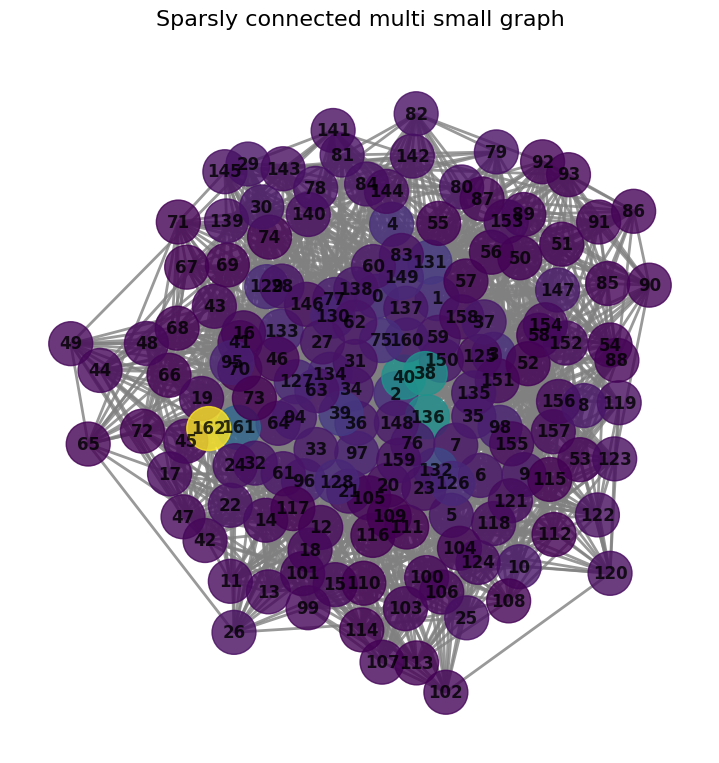

Carraghan-Pardalos experiment
optimized_carraghan_pardalos took 0.0131507718 seconds to execute
Maximum clique 10: {'66', '65', '67', '70', '73', '72', '68', '74', '69', '71'}
CP intersection set 10: {'66', '65', '67', '70', '73', '72', '68', '74', '69', '71'}
----------------------------------------------------------------------------------------------------
Bron-Kerbosh experiment
find_max_clique took 0.0263939460 seconds to execute
Maximum clique 10 <class 'set'>: {'117', '113', '116', '111', '108', '109', '114', '112', '115', '110'}
BK intersection set 0: set()
----------------------------------------------------------------------------------------------------
Tabu-Search experiment
find_maximum_clique took 0.0580668319 seconds to execute
Maximum clique 9: {'100', '103', '101', '105', '104', '106', '99', '102', '107'}
Tabu intersection set 0: set()
----------------------------------------------------------------------------------------------------


In [20]:
visualize_graph_customized(G_sparse_multi_small, "Sparsly connected multi small graph", layout="spring", dims=(7, 7))

print("Carraghan-Pardalos experiment")
# cp_solver: CarraghanPardalosCF = CarraghanPardalosCF(G_nc_small)
# nc_small_max_clique_cp: set = cp_solver.find_maximum_clique()
nc_small_max_clique_cp = optimized_carraghan_pardalos(G_sparse_multi_small)
nc_small_intersection_set_cp = sparse_multi_small_largest.intersection(nc_small_max_clique_cp)

print(f"Maximum clique {len(nc_small_max_clique_cp)}: {nc_small_max_clique_cp}")
print(f"CP intersection set {len(nc_small_intersection_set_cp)}: {nc_small_intersection_set_cp}")
print("-"*100)

print("Bron-Kerbosh experiment")
bk_solver = BronKerbosch(G_sparse_multi_small)
nc_small_max_clique_bk: set = bk_solver.find_max_clique()
nc_small_intersection_set_bk = sparse_multi_small_largest.intersection(nc_small_max_clique_bk)

print(f"Maximum clique {len(nc_small_max_clique_bk)} {type(nc_small_max_clique_bk)}: {nc_small_max_clique_bk}")
print(f"BK intersection set {len(nc_small_intersection_set_bk)}: {nc_small_intersection_set_bk}")
print("-"*100)


print("Tabu-Search experiment")
tabu_solver: TabuCliqueFinder = TabuCliqueFinder(G_sparse_multi_small, tabu_tenure=20, max_iterations=150)
nc_small_max_clique_tabu: set = tabu_solver.find_maximum_clique()
nc_small_intersection_set_tabu = sparse_multi_small_largest.intersection(nc_small_max_clique_tabu)

print(f"Maximum clique {len(nc_small_max_clique_tabu)}: {nc_small_max_clique_tabu}")
print(f"Tabu intersection set {len(nc_small_intersection_set_tabu)}: {nc_small_intersection_set_tabu}")
print("-"*100)

In [22]:
nodes: int = G_sparse_multi_small.number_of_nodes() 
tabu_tenure: int = nodes // 4

print(f"Nodes: {nodes}")

print("Tabu-Search experiment")
tabu_solver_2: TabuCliqueFinder = TabuCliqueFinder(G_sparse_multi_small, tabu_tenure=tabu_tenure, max_iterations=150)
sparse_multi_small_max_clique_tabu_2: set = tabu_solver_2.find_maximum_clique()
sparse_multi_small_intersection_set_tabu_2 = sparse_multi_small_largest.intersection(sparse_multi_small_max_clique_tabu_2)

print(f"Maximum clique {len(sparse_multi_small_max_clique_tabu_2)}: {sparse_multi_small_max_clique_tabu_2}")
print(f"Tabu intersection set {len(sparse_multi_small_intersection_set_tabu_2)}: {sparse_multi_small_intersection_set_tabu_2}")
print("-"*100)

Nodes: 163
Tabu-Search experiment
find_maximum_clique took 0.0657244790 seconds to execute
Maximum clique 9: {'58', '54', '53', '50', '51', '57', '56', '55', '52'}
Tabu intersection set 0: set()
----------------------------------------------------------------------------------------------------


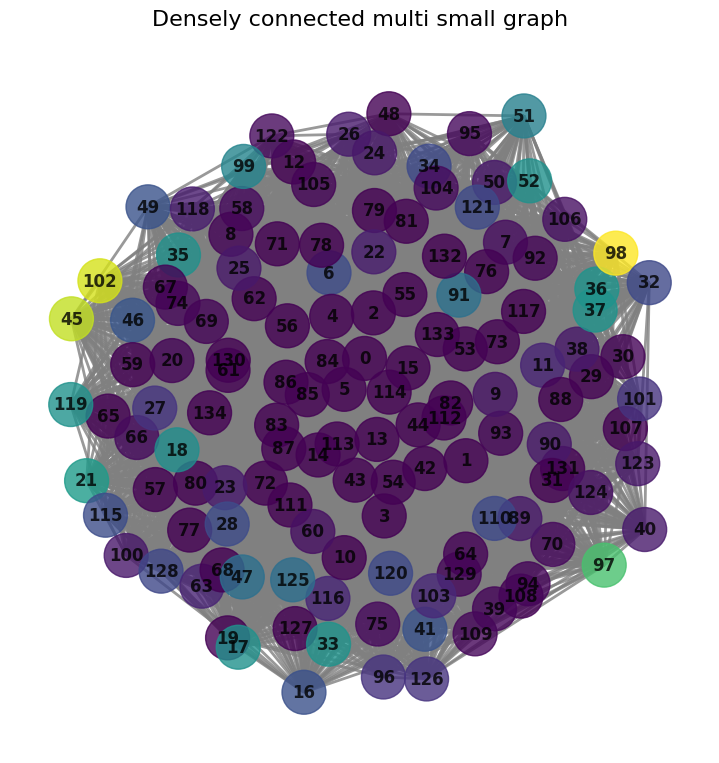

In [33]:
visualize_graph_customized(G_dense_multi_small, "Densely connected multi small graph", layout="spring", dims=(7, 7))


In [34]:

print("Carraghan-Pardalos experiment")
# cp_solver: CarraghanPardalosCF = CarraghanPardalosCF(G_nc_small)
# nc_small_max_clique_cp: set = cp_solver.find_maximum_clique()
dense_multi_small_max_clique_cp = optimized_carraghan_pardalos(G_dense_multi_small)
dense_multi_small_intersection_set_cp = dense_multi_small_largest.intersection(nc_small_max_clique_cp)

print(f"Maximum clique {len(dense_multi_small_max_clique_cp)}: {dense_multi_small_max_clique_cp}")
print(f"CP intersection set {len(dense_multi_small_intersection_set_cp)}: {dense_multi_small_intersection_set_cp}")
print("-"*100)

Carraghan-Pardalos experiment
optimized_carraghan_pardalos took 75.2049833860 seconds to execute
Maximum clique 18: {'79', '42', '56', '3', '84', '15', '86', '87', '114', '133', '83', '1', '0', '134', '85', '13', '14', '112'}
CP intersection set 1: {'65'}
----------------------------------------------------------------------------------------------------


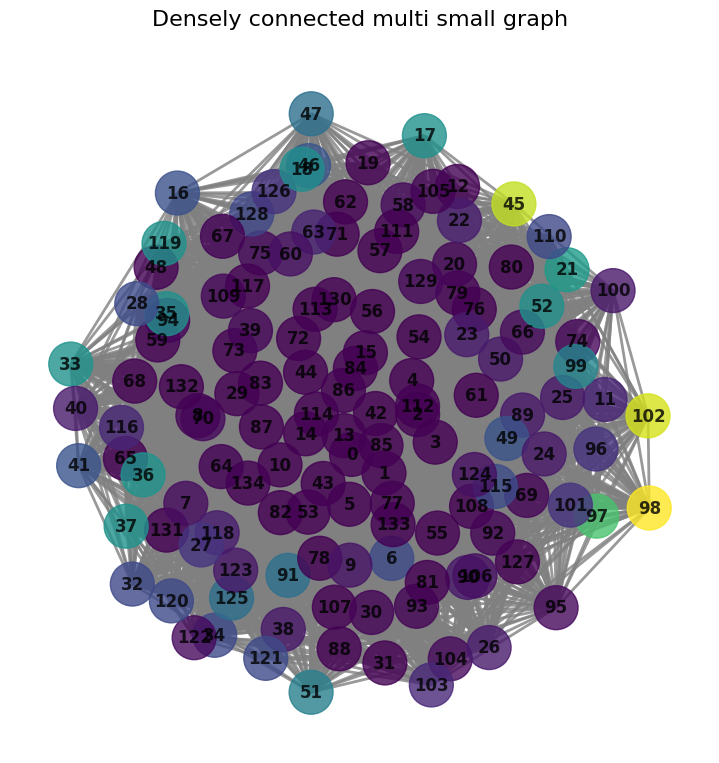

Carraghan-Pardalos experiment
optimized_carraghan_pardalos took 75.2554155050 seconds to execute
Maximum clique 18: {'79', '42', '56', '3', '84', '15', '86', '87', '114', '133', '83', '1', '0', '134', '85', '13', '14', '112'}
CP intersection set 1: {'65'}
----------------------------------------------------------------------------------------------------
Bron-Kerbosh experiment
find_max_clique took 3.4394844850 seconds to execute
Maximum clique 18 <class 'set'>: {'79', '42', '56', '3', '84', '15', '86', '87', '114', '133', '83', '1', '0', '134', '85', '13', '14', '112'}
BK intersection set 14: {'0', '1', '85', '79', '42', '56', '3', '84', '15', '14', '86', '87', '114', '83'}
----------------------------------------------------------------------------------------------------
Tabu-Search experiment
find_maximum_clique took 0.1966715029 seconds to execute
Maximum clique 14: {'85', '43', '56', '84', '107', '55', '15', '86', '87', '121', '114', '112', '133', '1'}
Tabu intersection set 9: {'

In [ ]:


print("Bron-Kerbosh experiment")
bk_solver = BronKerbosch(G_dense_multi_small)
dense_multi_small_max_clique_bk: set = bk_solver.find_max_clique()
dense_multi_small_intersection_set_bk = dense_multi_small_largest.intersection(dense_multi_small_max_clique_bk)

print(f"Maximum clique {len(dense_multi_small_max_clique_bk)} {type(dense_multi_small_max_clique_bk)}: {dense_multi_small_max_clique_bk}")
print(f"BK intersection set {len(dense_multi_small_intersection_set_bk)}: {dense_multi_small_intersection_set_bk}")
print("-"*100)


print("Tabu-Search experiment")
tabu_solver: TabuCliqueFinder = TabuCliqueFinder(G_dense_multi_small, tabu_tenure=20, max_iterations=150)
dense_multi_small_max_clique_tabu: set = tabu_solver.find_maximum_clique()
dense_multi_small_intersection_set_tabu = dense_multi_small_largest.intersection(dense_multi_small_max_clique_tabu)

print(f"Maximum clique {len(dense_multi_small_max_clique_tabu)}: {dense_multi_small_max_clique_tabu}")
print(f"Tabu intersection set {len(dense_multi_small_intersection_set_tabu)}: {dense_multi_small_intersection_set_tabu}")
print("-"*100)

In [31]:
nodes: int = G_dense_multi_small.number_of_nodes() 
tabu_tenure: int = nodes // 4

print(f"Nodes: {nodes}")

print("Tabu-Search experiment")
tabu_solver_2: TabuCliqueFinder = TabuCliqueFinder(G_dense_multi_small, tabu_tenure=tabu_tenure, max_iterations=200)
dense_multi_small_max_clique_tabu_2: set = tabu_solver_2.find_maximum_clique()
dense_multi_small_intersection_set_tabu_2 = dense_multi_small_largest.intersection(dense_multi_small_max_clique_tabu_2)

print(f"Maximum clique {len(dense_multi_small_max_clique_tabu_2)}: {dense_multi_small_max_clique_tabu_2}")
print(f"Tabu intersection set {len(dense_multi_small_intersection_set_tabu_2)}: {dense_multi_small_intersection_set_tabu_2}")
print("-"*100)

Nodes: 135
Tabu-Search experiment
find_maximum_clique took 0.2975333759 seconds to execute
Maximum clique 17: {'54', '82', '5', '42', '2', '56', '3', '29', '15', '86', '87', '31', '0', '53', '55', '14', '112'}
Tabu intersection set 8: {'0', '42', '56', '3', '15', '86', '87', '14'}
----------------------------------------------------------------------------------------------------
